<a href="https://colab.research.google.com/github/lucerogr/algorithmic-complexity/blob/main/PC1_PRACTICAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEPURAR

import pdb

pdb.set_trace()

***FUERZA BRUTA***

SELECTION SORT



In [ ]:
import random
x =[random.randint(1, 20) for _ in range(10)]
print(x)

[10, 11, 20, 7, 16, 4, 18, 15, 15, 6]


In [ ]:
def selectionSort(A: list):
    n = len(A)
    for i in range(n): # hasta n significa que hasta que ese numero salga
        min_pos=i
        for j in range(i+1, n):
            if A[j] < A[min_pos]:
                min_pos=j
        if min_pos != i:
           A[min_pos], A[i] = A[i], A[min_pos]

selectionSort(x)
print(x)

[4, 6, 7, 10, 11, 15, 15, 16, 18, 20]


BUBBLE SORT

In [ ]:
def bubbleSort(A: list):
    n = len(A)
    for i in range(n-1):
        for j in range (n-1-i):
            if A[j] > A[j+1]:
                A[j], A[j+1] = A[j+1], A[j]

bubbleSort(x)
print(x)

[4, 6, 7, 10, 11, 15, 15, 16, 18, 20]


STRING MATCHING

In [ ]:
def stringMatching(word, text):
    n = len(text)
    l = len(word)
    results=[]
    for i in range(n):
        if word == text[i:i+l]:
            results.append(i)
    return results

stringMatching("bra", "abracadabra")


[1, 8]

SEQUENCES

In [ ]:
import string
import random
def sequences(n, L):
  if L <=26 and L>=1 and n>0:
      A= string.ascii_uppercase
      for i in range(1, n+1):
          p=random.randint(0,L-1)
          print(A[p], end=" ") if i%4 == 0 else print(A[p], end="")

sequences(28, 3)

ABAB AABA CCBC CCBB ABCC CABC BBAB 

***BACKTRACKING***

N QUEENS

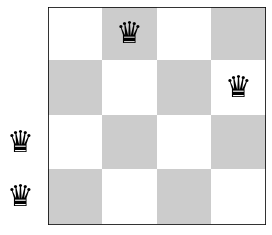

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def draw(board):
    n = len(board)
    tablero = np.zeros((n, n, 3))
    tablero += 0.8
    tablero[::2, ::2] = 1
    tablero[1::2, 1::2] = 1

    fig, ax = plt.subplots()
    ax.imshow(tablero, interpolation='nearest')

    for y, x in enumerate(board):
        ax.text(x, y, u'\u265B', size=30, ha='center', va='center')

    ax.set(xticks=[], yticks=[])
    ax.axis('image')

    plt.show()

draw([1, 3, -1, -1])

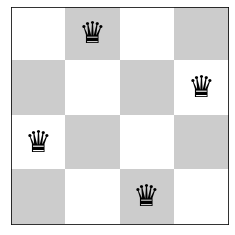

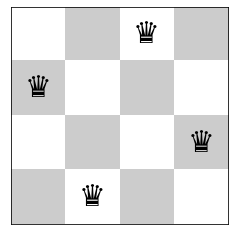

In [ ]:

def isLegal(board, row, column):
    n = len(board)
    for i in range(row):
        if board[i] == column:
            return False
        dif = row - i
        if board[i] + dif == column or board[i] - dif == column:
            return False
    return True

def nQueens(board, row):
    n = len(board)
    if row < n:
        for column in range(n):
            if isLegal(board, row, column):
                board[row] = column
                nQueens(board, row + 1)
    else:
        draw(board)


n = 4
nQueens([-1]*n, 0)

MAZE SOLVER

In [ ]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git 2>/dev/null

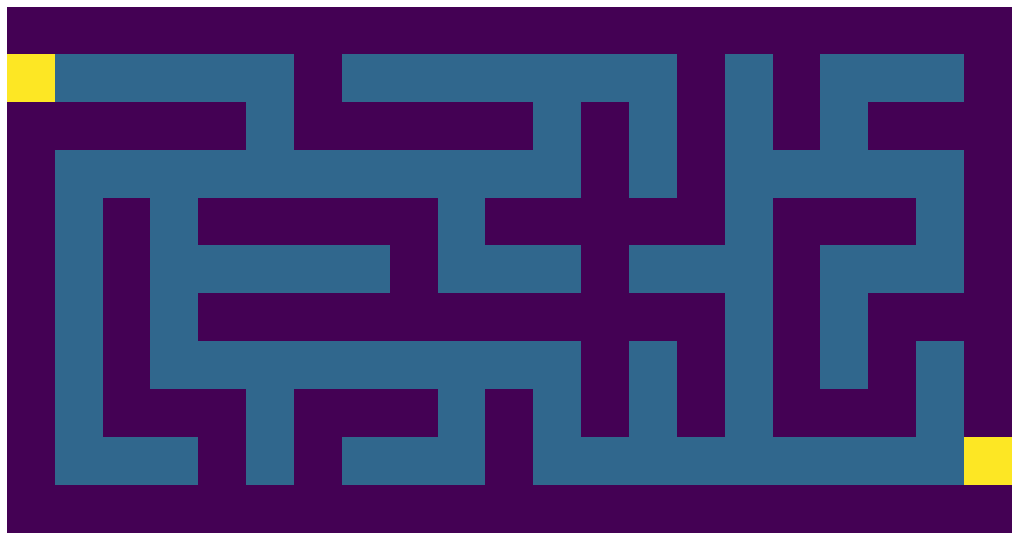

In [ ]:
from algorithmic_complexity.aclib.mazebuilder import makeMaze
import matplotlib.pyplot as plt

def drawMaze(maze):
    fig, ax = plt.subplots(figsize=(18, 18))
    ax.imshow(maze, cmap='viridis') # https://matplotlib.org/stable/tutorials/colors/colormaps.html
    ax.axis('off')

maze = makeMaze(5, 10) #filas, columnas
drawMaze(maze)

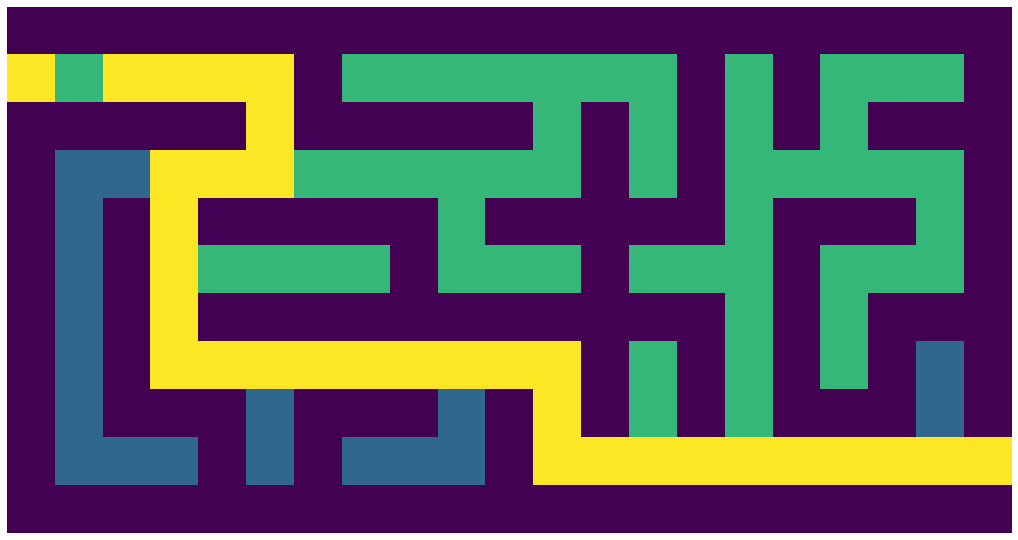

In [ ]:
def mazeSolve(maze, row, col, rowF, colF): #rowF = fila final
    maze[row][col] = 3              # camino correcto (amarillito)
    if row == rowF and col == colF:
        return True

    for r, c in [(row-1, col), (row, col+1), (row+1, col), (row, col-1)]:
        if maze[r][c] == 1 and mazeSolve(maze, r, c, rowF, colF):
            return True

    maze[row][col] = 2              # camino sin salida (verde)
    return False

rows, cols = maze.shape # matriz de numpy, sino, sería len(maze), len(maze[0])
mazeSolve(maze, 1, 1, rows - 2, cols -2)
drawMaze(maze)

SUDOKU

In [ ]:
N = 9 #N*N for sudoku
 
# A utility function to print grid
def printing(arr):
    for i in range(N):
        for j in range(N):
            print(arr[i][j], end = " ")
        print()
 
# Checks whether it will be
# legal to assign num to the
# given row, col
def isSafe(grid, row, col, num):
   
    # Check if we find the same num
    # in the similar row , we
    # return false
    for x in range(9):
        if grid[row][x] == num:
            return False
 
    # Check if we find the same num in
    # the similar column , we
    # return false
    for x in range(9):
        if grid[x][col] == num:
            return False
 
    # Check if we find the same num in
    # the particular 3*3 matrix,
    # we return false
    startRow = row - row % 3
    startCol = col - col % 3
    for i in range(3):
        for j in range(3):
            if grid[i + startRow][j + startCol] == num:
                return False
    return True
 
# Takes a partially filled-in grid and attempts
# to assign values to all unassigned locations in
# such a way to meet the requirements for
# Sudoku solution (non-duplication across rows,
# columns, and boxes) */
def solveSuduko(grid, row, col):
   
    # Check if we have reached the 8th
    # row and 9th column (0
    # indexed matrix) , we are
    # returning true to avoid
    # further backtracking
    if (row == N - 1 and col == N):
        return True
       
    # Check if column value  becomes 9 ,
    # we move to next row and
    # column start from 0
    if col == N:
        row += 1
        col = 0
 
    # Check if the current position of
    # the grid already contains
    # value >0, we iterate for next column
    if grid[row][col] > 0:
        return solveSuduko(grid, row, col + 1)
    for num in range(1, N + 1, 1):
       
        # Check if it is safe to place
        # the num (1-9)  in the
        # given row ,col  ->we
        # move to next column
        if isSafe(grid, row, col, num):
           
            # Assigning the num in
            # the current (row,col)
            # position of the grid
            # and assuming our assined
            # num in the position
            # is correct
            grid[row][col] = num
 
            # Checking for next possibility with next
            # column
            if solveSuduko(grid, row, col + 1):
                return True
 
        # Removing the assigned num ,
        # since our assumption
        # was wrong , and we go for
        # next assumption with
        # diff num value
        grid[row][col] = 0
    return False
 
# Driver Code
 
# 0 means unassigned cells
grid = [[3, 0, 6, 5, 0, 8, 4, 0, 0],
        [5, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 8, 7, 0, 0, 0, 0, 3, 1],
        [0, 0, 3, 0, 1, 0, 0, 8, 0],
        [9, 0, 0, 8, 6, 3, 0, 0, 5],
        [0, 5, 0, 0, 9, 0, 6, 0, 0],
        [1, 3, 0, 0, 0, 0, 2, 5, 0],
        [0, 0, 0, 0, 0, 0, 0, 7, 4],
        [0, 0, 5, 2, 0, 6, 3, 0, 0]]
 
if (solveSuduko(grid, 0, 0)):
    printing(grid)
else:
    print("no solution exists")
 
    # This code is contributed by sudhanshgupta2019a

3 1 6 5 7 8 4 9 2 
5 2 9 1 3 4 7 6 8 
4 8 7 6 2 9 5 3 1 
2 6 3 4 1 5 9 8 7 
9 7 4 8 6 3 1 2 5 
8 5 1 7 9 2 6 4 3 
1 3 8 9 4 7 2 5 6 
6 9 2 3 5 1 8 7 4 
7 4 5 2 8 6 3 1 9 


SEND MORE MONEY

In [ ]:
def validate(a, b, c, codex, chars):
    stra = a
    strb = b
    strc = c
    for i in range(len(codex)):
        stra = stra.replace(chars[i], str(codex[i])) #todas las S por 6 en esta palabra
        strb = strb.replace(chars[i], str(codex[i]))
        strc = strc.replace(chars[i], str(codex[i]))
    if int(stra) + int(strb) == int(strc):
        print(a, stra, b, strb, c, strc)

validate("SEND", "MORE", "MONEY", [7,6,4,9,0,8,1,5], "SENDMORY")

SEND 7649 MORE 0816 MONEY 08465


In [ ]:
def combinations(digits, n, w, chars, codex, a, b, c):
    if w == n:
        validate(a, b, c, codex, chars)
    else:
        for i in range(len(digits)):
          e = digits[i]
          combinations(digits[:i] + digits[i+1:], n, w+1, chars, codex + [e], a, b, c)

def solve(a, b, c):
    chars = list(set(a + b + c))
    digits = [i for i in range(10)] #set quita los repetidos 
    n = len(chars)
    combinations(digits, n, 0, chars, [], a, b, c)

solve("SEND", "MORE", "MONEY")

SEND 2817 MORE 0368 MONEY 03185
SEND 2819 MORE 0368 MONEY 03187
SEND 3719 MORE 0457 MONEY 04176
SEND 3829 MORE 0458 MONEY 04287
SEND 3712 MORE 0467 MONEY 04179
SEND 3821 MORE 0468 MONEY 04289
SEND 5849 MORE 0638 MONEY 06487
SEND 5731 MORE 0647 MONEY 06378
SEND 5732 MORE 0647 MONEY 06379
SEND 6853 MORE 0728 MONEY 07581
SEND 6419 MORE 0724 MONEY 07143
SEND 6415 MORE 0734 MONEY 07149
SEND 6524 MORE 0735 MONEY 07259
SEND 6851 MORE 0738 MONEY 07589
SEND 7429 MORE 0814 MONEY 08243
SEND 7539 MORE 0815 MONEY 08354
SEND 7649 MORE 0816 MONEY 08465
SEND 7531 MORE 0825 MONEY 08356
SEND 7316 MORE 0823 MONEY 08139
SEND 7534 MORE 0825 MONEY 08359
SEND 7643 MORE 0826 MONEY 08469
SEND 8432 MORE 0914 MONEY 09346
SEND 8324 MORE 0913 MONEY 09237
SEND 8542 MORE 0915 MONEY 09457
SEND 9567 MORE 1085 MONEY 10652


***DIVIDE Y VENCERAS***

OBTENER MAXIMO

In [ ]:
import random
def getMax(a, i, j): #a(arreglo), i(de donde), j(a donde)
    if i==j:
        return a[i]
    else:
        med = (i+j)//2
        maxi = getMax(a, i, med)
        maxd = getMax(a, med+1, j)
        return maxi if maxi > maxd else maxd

x = [random.randint(0,100) for _ in range(10)]
print(x)
getMax(x, 0, len(x)-1)

[81, 63, 9, 24, 16, 93, 21, 39, 37, 61]


93

MULTIPLICACION

In [ ]:
def mult(a, b, n): # n preferible que sea potencia de 2
    if n == 1:
        return a*b
    ai = a // 10**(n//2)
    ad = a % 10**(n//2)
    bi = b // 10**(n//2)
    bd = b % 10**(n//2)
    z1 = mult(ai, bi, n // 2) * 10**n
    z2 = mult(ai, bi, n // 2) * 10**(n//2) + mult(ad, bi, n//2) * 10**(n//2)
    z3 = mult(ad, bd, n // 2)
    return z1 + z2 + z3

r = mult(51, 5, 1)
print(r)

255


CONTEO DE PALABRAS

In [ ]:
def wc(lines, i, j):
    if i == j:
        return len(lines[i].strip().split(" "))
    med = (j+i) // 2
    return wc(lines, i, med) + wc(lines, med+1, j)

def wordCount(text):
    lines = text.strip().split('\n')
    print(lines)
    return wc(lines, 0, len(lines)-1)

text = """
hola mis amigos
como estan
yo estoy muy bien
todos van a jalar
"""

wordCount(text)

['hola mis amigos', 'como estan', 'yo estoy muy bien', 'todos van a jalar']


13

***GRAFOS***

En una matris de adyacencia -> O(n^2)

En una lista de adyacencia -> O(n+m)

In [ ]:
import networkx as nx
import numpy as np
n = 10
npmat = np.random.randint(2, size=(n, n))
npmat

array([[0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 1, 0, 1, 0, 1, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
       [0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 1, 1, 1, 1, 0]])

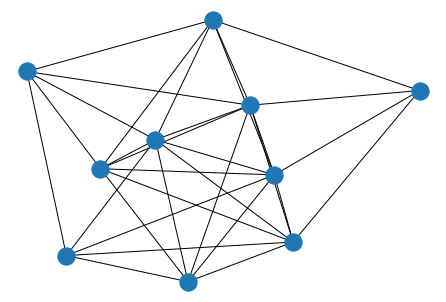

In [ ]:
G = nx.from_numpy_matrix(npmat)
nx.draw(G)

In [ ]:
import random
n = 10
mat = [[random.randint(0,1) for _ in range(n)] for _ in range(n)]
mat

[[1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
 [1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 1, 1],
 [0, 0, 0, 1, 0, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 1, 1, 1, 1, 0, 1],
 [1, 0, 1, 0, 0, 0, 1, 1, 1, 0]]

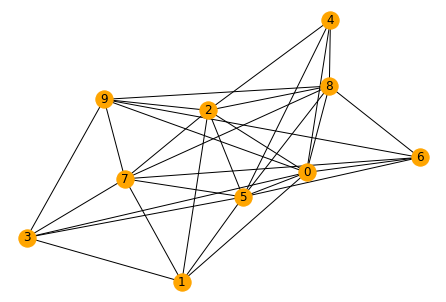

In [ ]:
G = nx.from_numpy_matrix(np.array(mat))
nx.draw(G, with_labels=True, node_color="orange")

LISTA DE ADYACENCIA

In [ ]:
n, m = 10, 30
lst=[[] for _ in range(n)]
for i in range(m):
    u = random.randint(0, n-1)
    while True:
        v = random.randint(0, n-1)
        if u != v and not v in lst[u]:
            break;
    lst[u].append(v)

for u in range(n):
    print(u, *lst[u])

0 7 9 5 8
1 7 3 0
2 9 1 5
3 5 2 0
4 8 2 0 5
5
6 2 5 1 3 8
7 6 2 3 9
8 6 0 2 1
9


In [ ]:
%%file 1.al
0 7 9 5 8
1 7 3 0
2 9 1 5
3 5 2 0
4 8 2 0 5
5
6 2 5 1 3 8
7 6 2 3 9
8 6 0 2 1
9

Writing 1.al


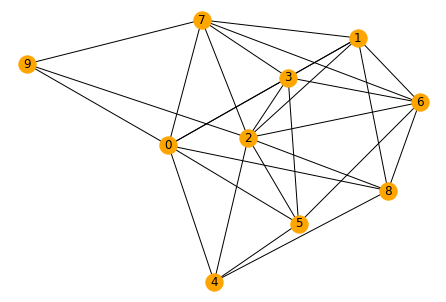

In [ ]:
G = nx.read_adjlist("1.al")
#para grafo dirigido
#G = nx.read_adjlist("1.al", create_using=nx.DiGraph)
nx.draw(G, with_labels=True, node_color="orange")

ADJACENCY MATRIX

In [ ]:
import random
import numpy as np
import networkx as nx

from algorithmic_complexity.aclib import graphstuff as gs

In [ ]:
def genAdjMatrix(n, m: int):
  mat = [[0]*n for _ in range(n)]

  temp = [1]*m
  temp += [0]*(n**2 - m)

  random.shuffle(temp)

  for i in range(n):
    for j in range(n):
      mat[i][j] = temp[i*n + j]

  return mat

G = genAdjMatrix(7, 13)
G

[[0, 0, 0, 0, 1, 0, 0],
 [0, 1, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 1, 0, 0, 1],
 [1, 0, 0, 1, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0]]

In [ ]:
#The same but using numpy
def genAdjMatrixnp(n, m: int):
  mat = np.zeros(n*n)
  mat[:m] = 1
  np.random.shuffle(mat)
  return mat.reshape((n, n))

Gnp = genAdjMatrixnp(7, 13)
print(Gnp)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]


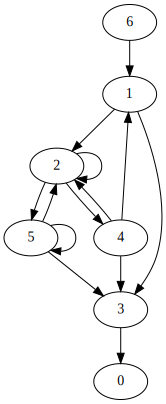

In [ ]:
import graphviz as gv
G = nx.from_numpy_matrix(Gnp, create_using=nx.DiGraph)
def as_gv(G):
    if G.is_directed():
        Gv = gv.Digraph()
    else:
      Gv = gv.Graph()

    for u, v in G.edges():
        Gv.edge(str(u), str(v))
    
    return Gv

as_gv(G)

ADJACENCY LIST

In [ ]:
def genAdjList(n, m: int):
  L = [[] for _ in range(n)]
  cont = 0
  while cont < m:
    u = random.randint(0, n-1)
    v = random.randint(0, n-1)
    if u != v and v not in L[u]:
      L[u].append(v)
      cont += 1
    
  return L

Gal = genAdjList(7, 13)
for u, edges in enumerate(Gal):
  print(u, *edges)

0 2 5 4 1
1 4 5 0
2 6 5 0
3
4 6
5 2 0
6


In [ ]:
%%file 1.adjlist
0 3
1 3 2
2 0
3 0 2
4 0 5 1 3
5 6
6 2 1

Overwriting 1.adjlist


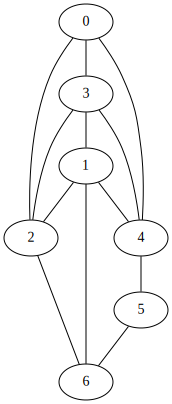

In [ ]:
G = nx.read_adjlist('1.adjlist')
as_gv(G)
#print(*G.neighbors('0'))

***BFS (BREADTH FIRST SEARCH)***

FOR ADJANCECY LIST(POR AMPLITUD)

In [101]:
%%file 2.adjlist
0 4 
1 
2 4 5 
3 5 7 
4 0 2 7
5 2 3
6 
7 3 4

Overwriting 2.adjlist


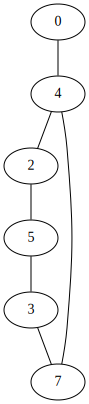

In [102]:
Gal = nx.read_adjlist('2.adjlist')
as_gv(Gal)

In [104]:
def bfs(G, s):
  n = G.order()
  visited = [False]*n
  path = [None]*n
  queue = [s]
  visited[s] = True

  while len(queue) > 0:
    u = int(queue[0])
    queue = queue[1:]
    for v in G.neighbors(str(u)):
      v = int(v)
      if not visited[v]:
        visited[v] = True
        path[v] = u
        queue.append(v)

  return path

path = bfs(Gal, 3)
print(path)

[4, None, 5, None, 7, 3, None, 3]


 BFS FOR MATRIX LIST

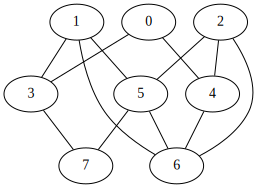

In [106]:
G = [[0, 0, 0, 1, 1, 0, 0, 0],
     [0, 0, 0, 1, 0, 1, 1, 0],
     [0, 0, 0, 0, 1, 1, 1, 0],
     [1, 1, 0, 0, 0, 0, 0, 1],
     [1, 0, 1, 0, 0, 0, 1, 0],
     [0, 1, 1, 0, 0, 0, 1, 1],
     [0, 1, 1, 0, 1, 1, 0, 0],
     [0, 0, 0, 1, 0, 1, 0, 0]]
G = np.array(G)

as_gv(nx.from_numpy_matrix(G))

[3, 5, 5, 1, 2, -1, 5, 5]


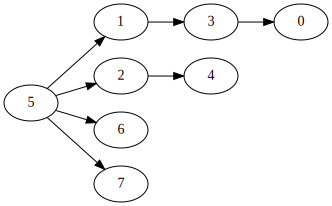

In [107]:
def bfsAM(G, s):
  n = len(G)
  queue = [s]
  path = [-1]*n
  visited = [False]*n
  visited[s] = True

  while queue:
    u = queue[0]
    for v in range(n):
      if G[u][v] == 1 and not visited[v]:
        visited[v] = True
        path[v] = u
        queue.append(v)

    del queue[0]

  return path

path = bfsAM(G, 5)
print(path)
gs.path2gv(path)

ANOTHER BFS FOR ADJ LIST

[3, 5, 5, 1, 2, -1, 5, 5]


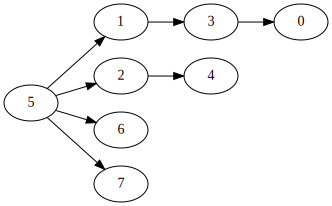

In [108]:
G = [[3, 4],
     [3, 5, 6],
     [4, 5, 6],
     [0, 1, 7],
     [0, 2, 6],
     [1, 2, 6, 7],
     [1, 2, 4, 5],
     [3, 5]]

def bfsAL(G, s):
  n = len(G)
  queue = [s]
  path = [-1]*n
  visited = [False]*n
  visited[s] = True

  while queue:
    u = queue[0]
    for v in G[u]:
      if not visited[v]:
        visited[v] = True
        path[v] = u
        queue.append(v)

    del queue[0]

  return path

path = bfsAL(G, 5)
print(path)
gs.path2gv(path)

BFS on NETWORKX GRAPH

In [110]:
%%file 3.adjlist
0 3 4
1 3 5 6
2 4 5 6
3 0 1 7
4 0 2 6
5 1 2 6 7
6 1 2 4 5
7 3 5

Writing 3.adjlist


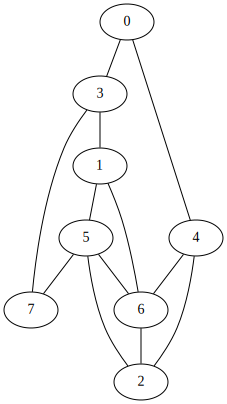

In [114]:
G = nx.read_adjlist('3.adjlist')
as_gv(G)

[3, 5, 5, 1, 2, -1, 5, 5]


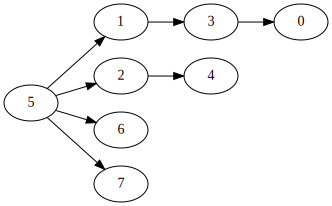

In [115]:
def bfs(G, s):
  queue = [s]
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['π'] = -1
  G.nodes[s]['visited'] = True
  while queue:
    u = queue[0]

    for v in G.neighbors(u):
      if not G.nodes[v]['visited']:
        G.nodes[v]['visited'] = True
        G.nodes[v]['π'] = u
        queue.append(v)

    del queue[0]


bfs(G, '5')
path = [0]*G.number_of_nodes()
for v, info in G.nodes.data():
  path[int(v)] = int(info['π'])

print(path)
gs.path2gv(path)

***DFS (DEPTH FIRST SEARCH)***

In [116]:
%%file 4.adjlist
0 3 4
1 3 5 6
2 4 5 6
3 0 1 7
4 0 2 6
5 1 2 6 7
6 1 2 4 5
7 3 5

Writing 4.adjlist


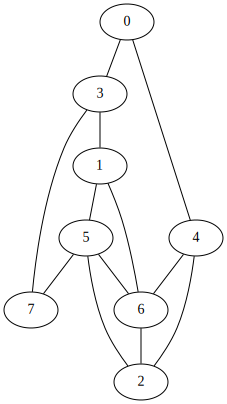

In [117]:
G = nx.read_adjlist('4.adjlist')
as_gv(G)

RECURSIVE IMPLEMENTATION WITH NETWORK GRAPH

[3, 5, 4, 1, 0, -1, 2, 3]


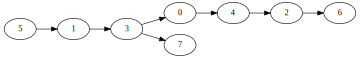

In [119]:
def _dfs(G, u):
  if not G.nodes[u]['visited']:
    G.nodes[u]['visited'] = True
    for v in G.neighbors(u):
      if not G.nodes[v]['visited']:
        G.nodes[v]['π'] = u
        _dfs(G, v)


def dfs(G, s):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['π'] = -1
  _dfs(G, s)


dfs(G, '5')
path = [0]*G.number_of_nodes()
for v, info in G.nodes.data():
  path[int(v)] = int(info['π'])

print(path)
gs.path2gv(path)

NON RECURSIVE IMPLEMENTATION WITH NETWORKX GRAPH

[3, 5, 4, 1, 0, -1, 2, 3]


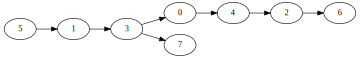

In [120]:
def dfsWithStack(G, s):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['π'] = -1

  stack = [s]
  while stack:
    u = stack.pop()
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      for v in reversed(list(G.neighbors(u))):
        if not G.nodes[v]['visited']:
          G.nodes[v]['π'] = u
          stack.append(v)

  path = [0]*G.number_of_nodes()
  for v, info in G.nodes.data():
    path[int(v)] = int(info['π'])

  return path

path = dfsWithStack(G, '5')
print(path)
gs.path2gv(path)

***DIJKSTRA/ USC(UNIFORM COST SEARCH)***

In [1]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git 1>/dev/null

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 207 (delta 114), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (207/207), 150.74 KiB | 9.42 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [2]:
from algorithmic_complexity.aclib import graphstuff as gs
import networkx as nx
import heapq as hq
import math

In [5]:
%%file 5.csv
#u,v,w
0,2,6
0,3,9
1,0,3
1,3,8
1,5,9
3,5,8
5,6,7
5,7,7
6,4,4
7,4,6

Writing 5.csv


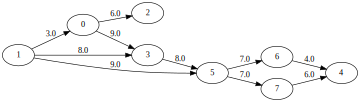

In [6]:
G = nx.read_weighted_edgelist('5.csv', create_using=nx.DiGraph, delimiter=',', nodetype=int)
gs.nx2gv(G, weighted=True)

HEAPS

In [7]:
import random
q = []
for _ in range(10):
  value = random.randint(1, 100)
  print(f"Inserting {value}")
  hq.heappush(q, value)

print(q)
while q:
  print(hq.heappop(q))

Inserting 85
Inserting 93
Inserting 64
Inserting 44
Inserting 62
Inserting 80
Inserting 82
Inserting 64
Inserting 84
Inserting 51
[44, 51, 80, 64, 62, 85, 82, 93, 84, 64]
44
51
62
64
64
80
82
84
85
93


In [8]:
q = []
for _ in range(10):
  priority = random.randint(1, 100)
  value = random.randint(1, 12124545)
  print(f"Inserting {value} with priority {priority}")
  hq.heappush(q, (priority, value))

for e in q:
  print(e)

print("Priority queue")
while q:
  print(hq.heappop(q))

Inserting 9594386 with priority 84
Inserting 3923009 with priority 11
Inserting 925284 with priority 100
Inserting 8380333 with priority 1
Inserting 926410 with priority 46
Inserting 2926058 with priority 76
Inserting 225178 with priority 10
Inserting 11616119 with priority 30
Inserting 9394592 with priority 93
Inserting 9986062 with priority 74
(1, 8380333)
(11, 3923009)
(10, 225178)
(30, 11616119)
(46, 926410)
(100, 925284)
(76, 2926058)
(84, 9594386)
(93, 9394592)
(74, 9986062)
Priority queue
(1, 8380333)
(10, 225178)
(11, 3923009)
(30, 11616119)
(46, 926410)
(74, 9986062)
(76, 2926058)
(84, 9594386)
(93, 9394592)
(100, 925284)


UCS

In [10]:
def dijkstra(G, s):
  for u in G.nodes:
    G.nodes[u]['visited'] = False #ninguno es visitado al inicio
    G.nodes[u]['path']    = -1 # ninguno tiene padre o predecesor
    G.nodes[u]['cost']    = math.inf # costo de todos infinito

  G.nodes[s]['cost'] = 0 #costo de s(Vertice) es 0
  q = [(0, s)] #agregamos a la cola el vertice con prioridad 0
  while q: #repetimos hasta que no quede nada en la cola
    g_u, u = hq.heappop(q) #recuperamos el primer elemento de la cola
    #g_u (costo/prioridad del vertice)   u (vertice)
    if not G.nodes[u]['visited']: #si no ha sido visitado el vertice en cuestion
      G.nodes[u]['visited'] = True # se marca como visitado
      for v in G.neighbors(u): # para todos sus vecinos 
        if not G.nodes[v]['visited']: #si no ha sido visitado el vecino
          w_uv = G.edges[u, v]['weight'] #recuperamos w_uv(el peso del arco uv)
          f_v  = g_u + w_uv #calculamos el nuevo costo para llegar a v (costo del 1er elementos + peso del arco)
          g_v  = G.nodes[v]['cost'] #recuperamos el costo actual de v (por si ya tiene uno)
          if f_v < g_v: #si el nuevo costo es menor que el costo actual
            G.nodes[v]['cost'] = f_v #el costo de v sera el nuevo costo
            G.nodes[v]['path'] = u # el padre sera u
            hq.heappush(q, (f_v, v)) #y se agregara a la cola, con el costo nuevo y el vertice que corresponde

  path = [0]*G.number_of_nodes() 
  for v, info in G.nodes.data():
    path[v] = info['path'] #formar un arreglo en el que se tiene el padre de cada elemento

  return path

[1, -1, 0, 1, 6, 1, 5, 5]


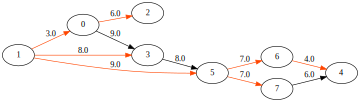

In [14]:
path = dijkstra(G, 1)
print(path)
gs.nx2gv(G, path=path, weighted=True)

In [15]:
a, b = nx.single_source_dijkstra(G, 1)
print("Paths by networkx")
for i in range(len(a)):
  print(f"Cost: {a[i]:2.0f} -> Path to {i}: {b[i]}")

Paths by networkx
Cost:  3 -> Path to 0: [1, 0]
Cost:  0 -> Path to 1: [1]
Cost:  9 -> Path to 2: [1, 0, 2]
Cost:  8 -> Path to 3: [1, 3]
Cost: 20 -> Path to 4: [1, 5, 6, 4]
Cost:  9 -> Path to 5: [1, 5]
Cost: 16 -> Path to 6: [1, 5, 6]
Cost: 16 -> Path to 7: [1, 5, 7]


SIMPLE ADJANCENCY LIST VERSION

In [16]:
def dijkstraNoNx(G, s):
  n = len(G)
  path = [-1]*n
  visited = [False]*n
  cost = [math.inf]*n

  cost[s] = 0
  q = [(0, s)]
  while q:
    g_u, u = hq.heappop(q)
    if not visited[u]:
      visited[u] = True
      for v, w_uv in G[u]:
        if not visited[v]:
          f_v = g_u + w_uv
          g_v = cost[v]
          if f_v < g_v:
            cost[v] = f_v
            path[v] = u
            hq.heappush(q, (f_v, v))

  return path

[1, -1, 0, 1, 6, 1, 5, 5]


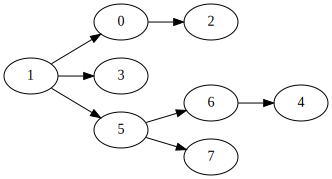

In [17]:
G = gs.wedges2adjlist('1.csv')
path = dijkstraNoNx(G, 1)
print(path)
gs.path2gv(path)

***DLS (DEPTH LIMITED SEARCH)***
O(v+L) 

v(numero de vertices)

L(profundidad)

In [29]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git 1>/dev/null


fatal: destination path 'algorithmic_complexity' already exists and is not an empty directory.


In [18]:
from algorithmic_complexity.aclib import graphstuff as gs
import networkx as nx

In [19]:
def _dls(G, u, limit):
  if limit > 0:
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      for v in G.neighbors(u):
        if not G.nodes[v]['visited']:
          G.nodes[v]['path'] = u
          G.nodes[v]['reached'] = True
          _dls(G, v, limit - 1)
def dls(G, s, limit):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['path']    = -1
    G.nodes[u]['reached'] = False  # alcanzado pero no explorado

  G.nodes[s]['reached'] = True
  _dls(G, s, limit)

  path = [0]*G.number_of_nodes()
  for v, data in G.nodes.data():
    path[v] = data['path']

  return path

In [23]:
%%file 6.adjlist
0 2 7 14
1 4
2
3 2 10
4 7
5 6 8 
6 3 5 
7 8 11 14
8 4
9 5 6 13 
10 6 9 17
11 12
12 11 16
13 12 16
14 
15 14
16 15
17 16

Overwriting 6.adjlist


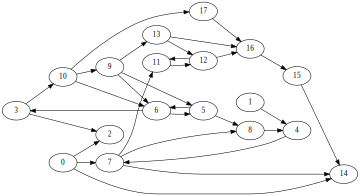

In [24]:
G = nx.read_adjlist('6.adjlist', create_using=nx.DiGraph, nodetype=int)
gs.nx2gv(G)

[-1, -1, 3, -1, -1, 6, 10, -1, 5, 10, 3, -1, 13, 9, -1, 16, 17, 10]


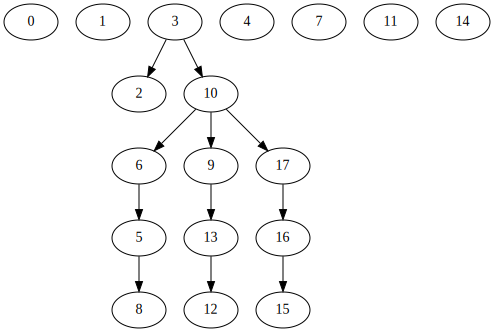

In [49]:
path = dls(G, 3,4)
print(path)
#gs.path2gv(path)
gs.path2gv(path, params={'rankdir':"TD", 'size':'8'}) #LR: Left ro Right, TD: Top to Down

#llegamos al 12 pero no lo visitamos

[-1, -1, 3, -1, -1, -1, 10, -1, -1, 10, 3, -1, -1, -1, -1, -1, -1, 10]


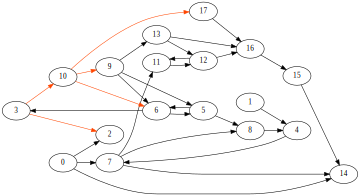

In [44]:
path = dls(G, 3, limit=2)
print(path)
gs.nx2gv(G, path=path)

***IDS (iterative Depth Search)***

In [51]:
def ids(G, start, target):
  for limit in range(G.number_of_edges()):
    path = dls(G, start, limit)
    if G.nodes[target]['reached']:
      break

  return path

[-1, -1, 3, -1, -1, 9, 10, -1, -1, 10, 3, -1, -1, 9, -1, -1, 17, 10]


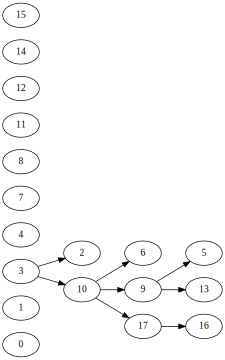

In [55]:
path = ids(G, 3, 16)
print(path)
gs.path2gv(path)
#gs.nx2gv(G, path=path)